In [1]:
!unzip '/content/drive/MyDrive/deepLearning/data/horse-or-human.zip' -d 'data'

Archive:  /content/drive/MyDrive/deepLearning/data/horse-or-human.zip
  inflating: data/horses/horse01-0.png  
  inflating: data/horses/horse01-1.png  
  inflating: data/horses/horse01-2.png  
  inflating: data/horses/horse01-3.png  
  inflating: data/horses/horse01-4.png  
  inflating: data/horses/horse01-5.png  
  inflating: data/horses/horse01-6.png  
  inflating: data/horses/horse01-7.png  
  inflating: data/horses/horse01-8.png  
  inflating: data/horses/horse01-9.png  
  inflating: data/horses/horse02-0.png  
  inflating: data/horses/horse02-1.png  
  inflating: data/horses/horse02-2.png  
  inflating: data/horses/horse02-3.png  
  inflating: data/horses/horse02-4.png  
  inflating: data/horses/horse02-5.png  
  inflating: data/horses/horse02-6.png  
  inflating: data/horses/horse02-7.png  
  inflating: data/horses/horse02-8.png  
  inflating: data/horses/horse02-9.png  
  inflating: data/horses/horse03-0.png  
  inflating: data/horses/horse03-1.png  
  inflating: data/horses/hor

In [2]:
from glob import glob

In [3]:
horses_fileList = glob("data/horses/*.png")
humans_fileList = glob("data/humans/*.png")

In [4]:
len(humans_fileList), len(horses_fileList)

(527, 500)

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

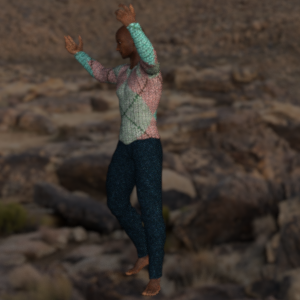

In [6]:
Image.open(humans_fileList[0])

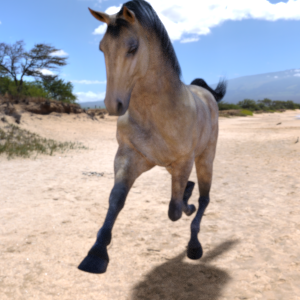

In [7]:
Image.open(horses_fileList[0])

In [17]:
from tensorflow import keras
# 전체 이미지를 1/255로 스케일 한다
generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [18]:
train_generator =  generator.flow_from_directory(
    'data',
    target_size = (300,300),  # 이미지의 가로세로를 300 300으로 변경
    class_mode='binary',
    subset='training'
)

Found 822 images belonging to 2 classes.


In [19]:
val_generator =  generator.flow_from_directory(
    'data',
    target_size = (300,300),  # 이미지의 가로세로를 300 300으로 변경
    class_mode='binary',
    subset='validation'
)

Found 205 images belonging to 2 classes.


In [10]:
train_generator

In [11]:
#첫번째 배치의 이미지와 레이블을 가져온다
images,labels =  next(train_generator)

In [12]:
images.shape, labels

((32, 300, 300, 3),
 array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       dtype=float32))

In [13]:
# 모델 생성
# C-P C-P C-P C-P C-P - F - D - D

In [20]:
model = keras.Sequential([
    keras.layers.Conv2D(64,kernel_size=3, activation='relu',input_shape = (300,300,3) ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(64,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(32,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(16,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(8,kernel_size=3, activation='relu' ),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [21]:
model.compile(optimizer='adam',loss = keras.losses.binary_crossentropy,metrics='accuracy')

In [ ]:
model.fit(train_generator, epochs=15,validation_data=val_generator)

Epoch 1/15
26/26 [==============================] - 13s 421ms/step - loss: 0.6262 - accuracy: 0.6180 - val_loss: 0.4313 - val_accuracy: 0.8439
Epoch 2/15
26/26 [==============================] - 9s 340ms/step - loss: 0.3811 - accuracy: 0.8260 - val_loss: 0.2649 - val_accuracy: 0.9220
Epoch 3/15
26/26 [==============================] - 8s 301ms/step - loss: 0.2213 - accuracy: 0.9148 - val_loss: 0.3690 - val_accuracy: 0.8098
Epoch 4/15
 3/26 [==>...........................] - ETA: 4s - loss: 0.1770 - accuracy: 0.9302